<a href="https://colab.research.google.com/github/313kris/house.price.prediction/blob/main/Yhillsproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE


In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Checking for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
# Filling missing values with median for numerical features only
numerical_features = data.select_dtypes(include=np.number).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())


In [7]:
# Encoding categorical variables
label_enc = LabelEncoder()
if 'ocean_proximity' in data.columns:
    data['ocean_proximity'] = label_enc.fit_transform(data['ocean_proximity'])

# Splitting features and target
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = LinearRegression()
selector = RFE(model, n_features_to_select=8)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')


In [11]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\nModel: {name}')
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))



Model: Linear Regression
RMSE: 71147.87146118375
MAE: 51820.7481502621
R2 Score: 0.6137068886499535

Model: Decision Tree
RMSE: 67856.17400448816
MAE: 42911.404312015504
R2 Score: 0.6486241755830744

Model: XGBoost
RMSE: 48354.40803736545
MAE: 32137.68109414744
R2 Score: 0.8215710655628462


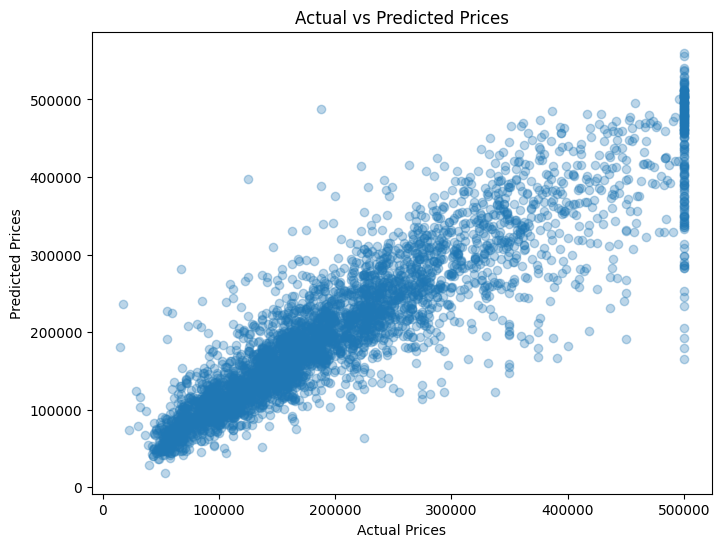

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()